# Assignment 3: LDA Topic Modeling

## Note
Installing Tomotopy locally can return an error, if that's the case run this notebook on Google Colab

## Research Background

LDA is a popular topic modeling algorithm widely used in the fields of Digital Humanities and Social Sciences. In the field of political communication, topic modeling is often applied for analyzing politicians Twitter/X posts, identitying thematic patterns or topics revolving around their posts.

For this assignment, students will work with tweets from two USA politicians, Donald Trump and Bernie Sanders, who are often regarded as right-wing populist and left-wing populist respectively. Right-wing populism often emphasizes nationalism, anti-immigration policies, and a critique of global elites from a culturally conservative perspective, focusing on preserving traditional values and social hierarchies. Left-wing populism prioritizes economic inequality, advocating for the redistribution of wealth, expansion of social services, and empowerment of the working class against the capitalist elite. While both forms of populism appeal to the "common people" against perceived elites and established structures, they diverge significantly in their identification of the elites, proposed solutions, and core ideologies. For a more detailed explanation, you can read the chapter by Macaulay (2019) "Bernie and The Donald: A comparison of left-and right-wing populist discourse" (full reference below).

**Research Questions**
1. What topics are revolving around Donald Trump and Bernie Sanders' posts separately?
2. What are the topic differences between Trump (right-wing popoulist) and Sanders (left-wing populist)?

**Aim:**
1. The first aim of the assignment is to conduct LDA topic modeling. Identify thematic patterns or politics revolving around Trump or Sanders's posts.
2. The second aim is to critically evaluate the results of topic modeling. Try different numbers of topics to see with which settings the topics are more coherent. Critically reflect on the results of LDA topic modeling, discussing them in relation to existing theories about populism.

**Data**
Two datasets are prepared for this assginment. Tweets from Trump and tweets from Sanders. Students are asked to work on these two datasets.

**Methods**
1. Word segamentation
2. Removing stopwords
3. LDA topic modeling
4. Topic evaulation (coherence and human evaluation)
5. Visualization of results.

**References**
1. Macaulay, M. (2019). Bernie and the Donald: A comparison of Left-and Right-wing populist discourse. *Populist discourse: International perspectives*, 165-195.





## Setup

### Q1. Install necessary libraries, including `tomotopy` and `little_mallet_wrapper`, and import them

In [1]:
!pip install tomotopy


In [2]:
!pip install little_mallet_wrapper

In [3]:
import tomotopy as tp #for topic modeling
import little_mallet_wrapper #for text processing
import seaborn #for data visualization
import glob #for searching files in the file system
from pathlib import Path #for processing file paths
import pandas as pd #for data processing and analysis
import re #for preprocessing text data

## Data preprocessing

### Q2. Load the two datasets and concatenate them

The goal is to run topic modelling on the combined dataset of Sanders and Trump's tweets

In [4]:
# Q2 
# Specify file path
Sanders_tweets = "sanders_tweets.csv"
Trump_tweets = "trump_tweets.csv"

#Reading two CSV files using pandas
df1 = pd.read_csv(Sanders_tweets)
df2 = pd.read_csv(Trump_tweets)

# concatenate two data frames
concatenated_df = pd.concat([df1, df2], ignore_index=True)

print(concatenated_df.head())



     Username              TweetId                           Title  \
0  SenSanders  1351670845639421952  SenSanders_1351670845639421952   
1  SenSanders  1351259762722279424  SenSanders_1351259762722279424   
2  SenSanders  1351242822293319680  SenSanders_1351242822293319680   
3  SenSanders  1350885541911400448  SenSanders_1350885541911400448   
4  SenSanders  1349880150041780224  SenSanders_1349880150041780224   

                                             Content  
0  Wealth increase in past 10 months:\n⬆️$173 bil...  
1  Amidst massive income and wealth inequality te...  
2  “We now have the resources, we now have the sk...  
3  After surviving an attempt on his life, Russia...  
4  President-Elect Biden's COVID rescue plan will...  


### Q3. Clean the data

Transform all tweets to lowercase, remove stopwords, punctuation, and numbers. Add the processed text to a list called `training_data`.
Create a list with the content of the tweets (`original_texts`) and a list that allows you to identify both the author of the tweet and its ID (`titles`).


Tip: add the following line to remove URLS and user mentions
processed_text = re.sub(r"http\S+|www\S+|https\S+|\/\/t|co\/|\@\w+|realdonaldtrump", '', processed_text, flags=re.MULTILINE)

### Description for the code.
First, iterate over each row of data in a DataFrame and then extract the tweet text and author ID in each row. Next, the extracted tweet text is processed, including converting to lowercase, removing numbers and specific patterns of text. Finally, the processed text is added to a list while preserving the original text and author ID.

In [5]:
# Q3 (code)

#Created an empty list to store processed tweets
training_data = []
#Created an empty list to store the content of the tweets
original_texts = []
#Created an empty list to store both the author of the tweet and its ID
titles = []


for index, row in concatenated_df.iterrows():
    tweet_text = row['Content']
    author_id = row['Title']
    
    processed_text = little_mallet_wrapper.process_string(tweet_text, numbers='remove')
    processed_text = re.sub(r"http\S+|www\S+|https\S+|\/\/t|co\/|\@\w+|realdonaldtrump", '', processed_text, flags=re.MULTILINE)
    
    training_data.append(processed_text)
    original_texts.append(tweet_text)
    titles.append(author_id)


    



Check the length of the three lists. Ensure that there are no errors or omissions in data processing.

In [6]:
len(training_data), len(original_texts), len(titles)

(30371, 30371, 30371)

## LDA topic modelling

### Q4. Train a an LDA topic model with `tomotopy`

This code uses the Topic Model in the tomotopy library to perform topic modeling on tweets.
First, the number of topics to be returned, num_topics, and the number of words for each topic to be printed, num_topic_words, are set.
As the number of iterations increases, the log likelihood gradually increases, indicating that the model gradually improves its ability to fit the data during the training process.

In [7]:
# Q4 (code)
# Number of topics to return
num_topics = 10
# Numer of topic words to print out
num_topic_words = 10

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')



Topic Model Training...


Iteration: 0	Log-likelihood: -9.584155096743068
Iteration: 10	Log-likelihood: -9.240209536182848
Iteration: 20	Log-likelihood: -9.071731525568795
Iteration: 30	Log-likelihood: -8.99129448065222
Iteration: 40	Log-likelihood: -8.944057064060699
Iteration: 50	Log-likelihood: -8.911981738287613
Iteration: 60	Log-likelihood: -8.888270462488595
Iteration: 70	Log-likelihood: -8.866955638857347
Iteration: 80	Log-likelihood: -8.856741339391098
Iteration: 90	Log-likelihood: -8.845626000995113


### Q5. Print out the top words for each topic and manually evaluate their coherence


#### The purpose of this code is to print out the results of the topic model. It uses the get_topic_words method to get the first 10 words in each topic, concatenates the words into a string, and prints it out.

In [8]:
# Q5a (code)
# Print out top 10 words for each topic
print("\nTopic Model Results:\n\n")

topics = []
top_words_per_topic = []

for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    top_words_per_topic.append(topic_words.split())
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")



Topic Model Results:


✨Topic 0✨

trump fbi russia collusion mueller witch hunt campaign obama hillary

✨Topic 1✨

trump people states united court must vote president election supreme

✨Topic 2✨

great border china country get big trade vote crime deal

✨Topic 3✨

trump president biden joe live watch whitehouse teamtrump via coronavirus

✨Topic 4✨

tax jobs trump economy workers billion year americans american time

✨Topic 5✨

great thank north today big president new maga see congratulations

✨Topic 6✨

news fake media never people even would president like democrats

✨Topic 7✨

great thank today law america whitehouse people president day american

✨Topic 8✨

senate president trump house war democrats american people must today

✨Topic 9✨

health care people must need americans country right make million



### Q5b (words)
### Describe what each topic is about. What ideas, values, or situations do these keywords refer to?

#### Topic00 :
Topic mentions President Trump, the FBI, Russia, collusion, the Mueller investigation, Obama and Hillary, among other topics. These keywords are related to political scandals, investigations, and campaigns.

#### Topic01:
Topic covers on subjects like elections, judges, the United Nations, people, and President Trump. Keywords may represent debates and worries about politics, elections, and the rule of law. They are associated with government institutions, electoral processes, and legal frameworks.

#### Topic02:
Topics like international boundaries, China, trade, criminal activity, and transactions are among the keywords related to this topic. Keywords may represent talks about trade policy, border security, and international relations and are associated with economic development, national security, and international trade.

#### Topic03:
Topic covers topics such as President Trump, Biden, the team, coronavirus, and live streaming. The keywords may point to the epidemic and government response measures, and may reflect attention and evaluation of the government's response to the epidemic.

#### Topic04:
Discusses themes including jobs, taxes, the economy, laborers, and Americans. The topic of tax policy, employment, and economic growth is reflected in the keywords, which also refer to economic policy, employment status, and issues of people's livelihoods.

#### Topic05:
Topics include congratulations, praise from the president, geography, and other things. The subject content may represent political image-building and regional promotion initiatives, and the keywords may indicate political propaganda.

#### Topic 6:
News, fake news, the media, people, and the Democratic Party are among the subjects covered. Reflecting conversations on media reporting and public opinion distribution, the terms may refer to news reporting, public opinion dissemination, and political propaganda.

#### Topic7:
Topical keywords include "law," "the United States," "the White House," and "the President." Concerns and assessments of the rule of law, government actions, and national image may be reflected in the keywords, which may refer to the legal system, government activities, and national image.

#### Topic8:
Subject includes the Democratic Party, the War, the President, Congress, and the Senate. Keywords can refer to the foreign policy, domestic political climate, and political system. They may also represent conversations and worries regarding partisan politics, the foreign policy, and the political system.

#### Topic9:
The topic's keywords discuss rights, people, healthcare, and nations. Keywords may relate to social welfare policies, human rights issues, and the health care system. They may also represent conversations and worries about public services, social welfare, and health care.



## Topic coherence

Use `tomotopy`'s [`.coherence()`](https://bab2min.github.io/tomotopy/v0.10.0/en/coherence.html) function to automatically calculate the topic coherence.

The coherence value can vary from `0` (no coherence) to `1` (maximum coherence). Interpret the results and, if needed, retrain the model using a different number of topics.

In the next steps, I will change the modeling quantities differently and compare the results to different values. The first step is to calculate when the number of topics is equal to 10.

In [9]:
# There are different metrics for coherence, we choose `c_v`
#when the number of topic is 10
coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.5300679301470519 
Per Topic: [0.7552896708250045, 0.43945021033287046, 0.5151298642158508, 0.5060005933046341, 0.5546258792281151, 0.47522803246974943, 0.5383857570588588, 0.44784812778234484, 0.42319389879703523, 0.6455272674560547]



If we change the number of topics to 15, below are his results.

In [10]:
# Number of topics to return
num_topics = 15
# Numer of topic words to print out
num_topic_words = 10

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())


# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)

In [11]:
coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.5838909317553044 
Per Topic: [0.4760416477918625, 0.4897840052843094, 0.7019888609647751, 0.541249381005764, 0.5579821974039078, 0.5652564227581024, 0.6172722220420838, 0.5341958269476891, 0.5516673043370247, 0.7534427493810654, 0.6251252621412278, 0.5867281593382359, 0.5854206204414367, 0.6067794561386108, 0.5654298603534699]



If we change the number of topics to 20, below are his results

In [12]:
# Number of topics to return
num_topics = 20
# Numer of topic words to print out
num_topic_words = 10

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())


# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)

In [13]:
coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.5972283794172109 
Per Topic: [0.6481296867132187, 0.5807111173868179, 0.5982609026134014, 0.5716274708509446, 0.463414266705513, 0.42751650474965575, 0.6392077341675758, 0.6203683286905288, 0.5755113780498504, 0.7779797196388245, 0.6197934910655022, 0.5942909121513367, 0.672649934887886, 0.4478768542408943, 0.5992283090949059, 0.5509035795927048, 0.577549223601818, 0.615239268541336, 0.7630153626203537, 0.6012935429811478]



### Q6. Interpret topic coherence

Report the following:
- number of topics you initially used to train the model and the coherence score you got
- changes made to the number of topics and new coherence scores obtained

## Q6 (words)
When I set the number of modeling to 10, the coherence score I got was 0.530. When I set the number of modeling to 15, the coherence score I got was 0.583; when I set the number of modeling to 20, The coherence score I got was 0.597. As the number of topics in the model increases, the relatedness or coherence between words within the topics also increases, increasing from 10 to 15 and from 15 to 20 both results in a better coherence score improvement. Based on the above results, we can speculate that as the number of topics increases, the model may be better able to capture topic correlations in the data.

### X1. Optional question 1
(This question is not compulsory, it only allows you to get an extra point.)

Create a function to plot the average coherence for models with different number of topics.

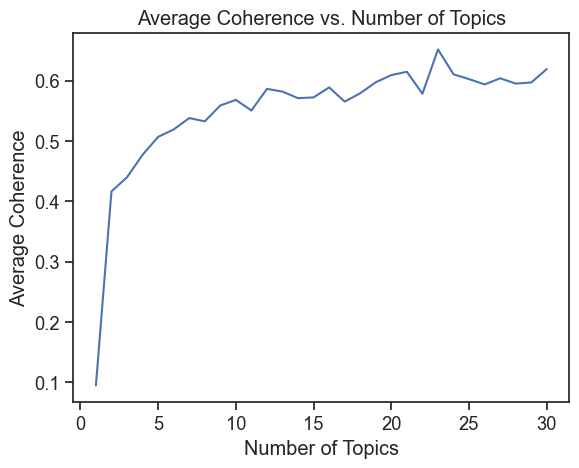

In [14]:
# X1 (code)
# Tip: y = average topic coherence; x = number of topics in the model
import matplotlib.pyplot as plt #for drawing charts

#First define a function 
#then create an empty list to store the average coherence under different number of topics.

def plot_coherence(topics_num, training_data):
    average_coherence_list = []
    topics_num_list = range(1, topics_num+1) #Created a range of topic numbers

    #Loop through each topic number
    for num_topics in topics_num_list:
        model = tp.LDAModel(k=num_topics)
        
        #Split tweets and add them to the model
        for tweet in training_data:
            model.add_doc(tweet.strip().split())
        iterations = 10 #Set the number of iterations to 10
        for i in range(0, 100, iterations):
            model.train(iterations)
            
        #After each iteration, the topic coherence of the model was calculated, 
        #using the c_v coherence measure.
        #Then calculate coherence scores are added to the list.
        coh = tp.coherence.Coherence(model, coherence='c_v')
        average_coherence_list.append(coh.get_score())

    plt.plot(topics_num_list, average_coherence_list)
    plt.title('Average Coherence vs. Number of Topics')
    plt.xlabel('Number of Topics')
    plt.ylabel('Average Coherence')
    plt.show()

# Test:
plot_coherence(30, training_data)

### Q7. Topic distributions
Calculate the topic distributions for all tweets and get the top documents for some topics (between 2 and 5) that you think could be more representative of Sanders or Trump.

In [15]:
# Q7a (code)
#Create two empty lists to store topic keywords and word lists in the topic
topics = []
topic_individual_words = []

#Traverse each topic and obtain the keywords of the topic
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words) #Add topic keywords to the topics list
#Keyword splitting and adding the word list to the topic_individual_words list    
    topic_individual_words.append(topic_words.split()) 

    #Get the distribution of each document across all topics
topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]


In [16]:
#See how document 30 is distributed across topics
topic_distributions[29]

[0.0034249607,
 0.0037344247,
 0.0027223006,
 0.0035859141,
 0.002938958,
 0.07516311,
 0.0033568544,
 0.2547001,
 0.0033364557,
 0.03783879,
 0.18063945,
 0.0052238214,
 0.25426605,
 0.005008226,
 0.006837036,
 0.0030996574,
 0.003076469,
 0.1454837,
 0.0029969027,
 0.0025668438]

In [17]:
from IPython.display import Markdown, display
import re

#Convert this string to Markdown format using the Markdown and display functions
def make_md(string):
    display(Markdown(str(string)))

#Find the top 5 documents for a specific topic in the topic distribution and display their topic words in bold
def get_top_docs(docs, topic_distributions, topic_index, n=5):

    sorted_data = sorted([(_distribution[topic_index], _document)
                          for _distribution, _document
                          in zip(topic_distributions, docs)], reverse=True)

    topic_words = topics[topic_index]

    make_md(f"### ✨Topic {topic_index}✨\n\n{topic_words}\n\n")
    print("---")

    for probability, doc in sorted_data[:n]:
        # Make topic words bolded
        for word in topic_words.split():
            if word in doc.lower():
                doc = re.sub(f"\\b{word}\\b", f"**{word}**", doc, re.IGNORECASE)

        make_md(f'✨  \n**Topic Probability**: {probability}  \n**Document**: {doc}\n\n')

    return

In [18]:
# Find the top 5 documents in the topic 2 in the topic distribution
get_top_docs(titles, topic_distributions, topic_index=2, n=5)


### ✨Topic 2✨

court supreme justice president public law school debt college student



---


✨  
**Topic Probability**: 0.9091978669166565  
**Document**: @realDonaldTrump_1310024605554282496



✨  
**Topic Probability**: 0.887809157371521  
**Document**: SenSanders_1008811972920475648



✨  
**Topic Probability**: 0.8807889819145203  
**Document**: SenSanders_1006592085221347328



✨  
**Topic Probability**: 0.863736093044281  
**Document**: SenSanders_1103377640403161088



✨  
**Topic Probability**: 0.863736093044281  
**Document**: @realDonaldTrump_1037043834482552832



In [19]:
get_top_docs(titles, topic_distributions, topic_index=3, n=5)

### ✨Topic 3✨

china trade states deal wall united big much dollars street



---


✨  
**Topic Probability**: 0.930285632610321  
**Document**: @realDonaldTrump_1136890966533660674



✨  
**Topic Probability**: 0.930285632610321  
**Document**: @realDonaldTrump_1135361632840716288



✨  
**Topic Probability**: 0.9276024103164673  
**Document**: @realDonaldTrump_1164750202781216768



✨  
**Topic Probability**: 0.893222987651825  
**Document**: @realDonaldTrump_1003618276293988352



✨  
**Topic Probability**: 0.8891132473945618  
**Document**: @realDonaldTrump_1126815129218293760



In [20]:
get_top_docs(titles, topic_distributions, topic_index=4, n=5)

### ✨Topic 4✨

trump president party republican america donald approval american thank pro



---


✨  
**Topic Probability**: 0.8537062406539917  
**Document**: SenSanders_1050784840797306880



✨  
**Topic Probability**: 0.8418696522712708  
**Document**: @realDonaldTrump_1300036400943902721



✨  
**Topic Probability**: 0.8414960503578186  
**Document**: SenSanders_833717841853550592



✨  
**Topic Probability**: 0.8414960503578186  
**Document**: SenSanders_812702391074230272



✨  
**Topic Probability**: 0.8414960503578186  
**Document**: SenSanders_758348016331829248



In [21]:
get_top_docs(titles, topic_distributions, topic_index=5, n=5)

### ✨Topic 5✨

years trump iran people news world foxnews time last president



---


✨  
**Topic Probability**: 0.9060041904449463  
**Document**: @realDonaldTrump_1065948536498544640



✨  
**Topic Probability**: 0.874633252620697  
**Document**: @realDonaldTrump_1059104932215906304



✨  
**Topic Probability**: 0.874633252620697  
**Document**: @realDonaldTrump_1057715198684000258



✨  
**Topic Probability**: 0.8562650084495544  
**Document**: @realDonaldTrump_1187876420342689792



✨  
**Topic Probability**: 0.8483688235282898  
**Document**: @realDonaldTrump_1189154764359196672



Interpret the results above. Are there topics that have top tweets only by one politician? Why do you think these topics are more representative of one of the two politicians' views?

# Q7b (words)
In topic 3 and topic 5, the first few tweets only come from the @realDonaldTrump account, while in topic 2 and topic 4, most of the first few tweets come from the account SenSanders. By observing the subject words of topic 3 and topic 5, we found that keywords such as China, trade, and country appeared in topic 3, and keywords such as Iran, people, and Fox News appeared in topic 5. These topics are likely to represent Trump. popular political views. In Trump's foreign policy, Iran and China are two of the focuses. Trump imposes trade sanctions on China and imposes economic sanctions on Iran.
ref:https://edition.cnn.com/2019/09/24/politics/donald-trump-united-nations-speech-iran-2019/index.html

## Large scale analysis

### Q8. Create a random sample of the whole dataset and visualize the topic distributions for the sampled tweets

In [22]:
# Crete a sample of tweets
#Randomly select 100 elements from the sequence titles and store them in the list target_labels.

from random import sample

target_labels = sample(titles,100)

In [23]:
# Q8 (code)
# Create a heatmap using the random sample
# Tip: to display more than 20 tweets you have to change the values of `dim =` in sns.heatmap()

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='ticks', font_scale=1.2)
def plot_categories_by_topics_heatmap(labels,
                                      topic_distributions,
                                      topic_individual_words,
                                      output_path=None,
                                      target_labels=None,
                                      color_map = sns.cm.rocket_r,
                                      dim=None):

    # Combine the labels and distributions into a list of dictionaries.
    dicts_to_plot = []
    for _label, _distribution in zip(labels, topic_distributions):
        if not target_labels or _label in target_labels:
            for _topic_index, _probability in enumerate(_distribution):
                dicts_to_plot.append({'Probability': float(_probability),
                                      'Category': _label,
                                      'Topic': 'Topic ' + str(_topic_index).zfill(2) + ': ' + ' '.join(topic_individual_words[_topic_index][:5])})

    # Create a dataframe, format it for the heatmap function, and normalize the columns.
    df_to_plot = pd.DataFrame(dicts_to_plot)
    df_wide = df_to_plot.pivot_table(index='Category',
                                     columns='Topic',
                                     values='Probability')
    df_norm_col=(df_wide-df_wide.mean())/df_wide.std()

    # Show the final plot.
    if dim:
        plt.figure(figsize=dim)
    sns.set(style='ticks', font_scale=1.0)
    ax = sns.heatmap(df_norm_col, cmap=color_map)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=30, ha='left')
    plt.tight_layout()
    plt.show()



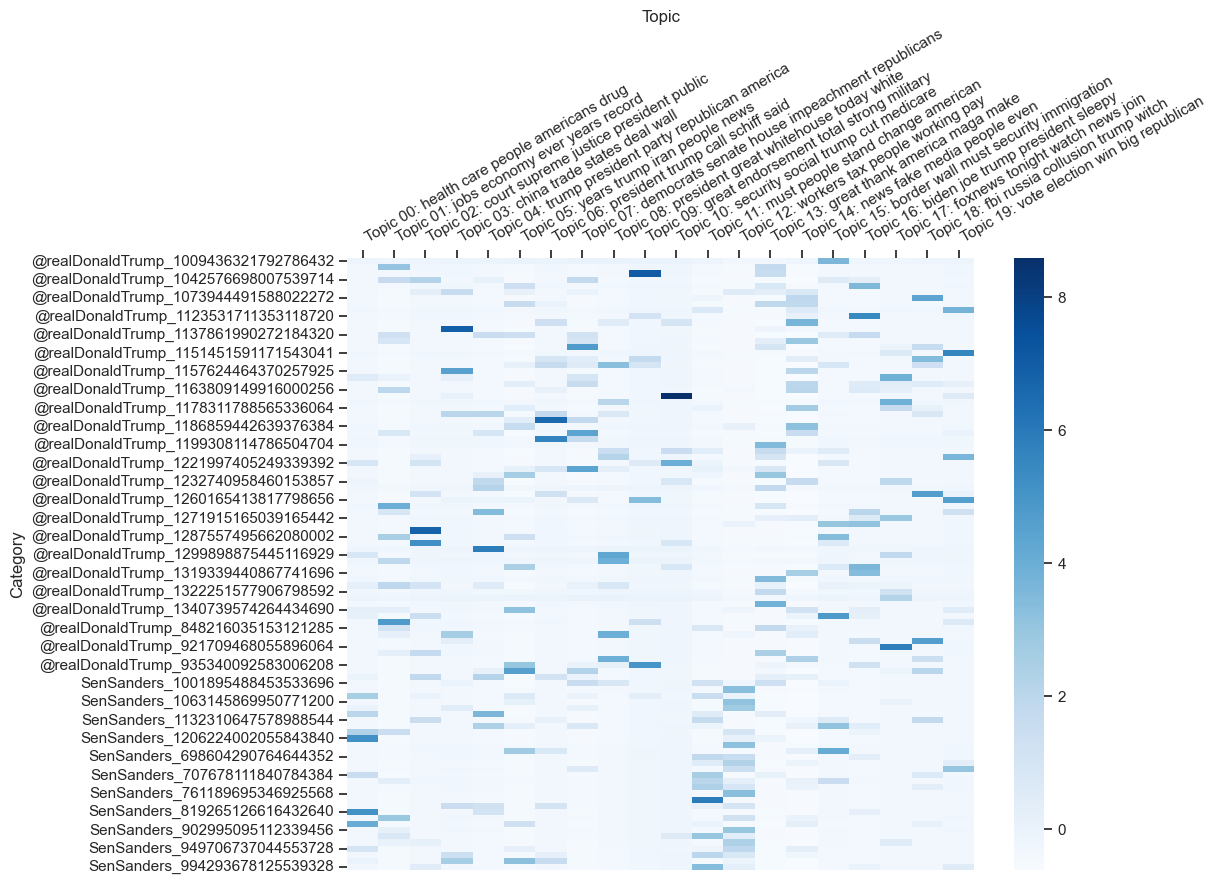

<Figure size 640x480 with 0 Axes>

In [24]:
plot_categories_by_topics_heatmap(titles,
                                  topic_distributions,
                                  topic_individual_words,
                                  target_labels=target_labels,
                                  color_map = 'Blues',
                                 dim=(12,9))
plt.tight_layout()
# For all possible color maps, see https://matplotlib.org/stable/tutorials/colors/colormaps.html#miscellaneous

### Q9. Interpret the heatmap
Do you see any pattern in the probability distributions of topics for each politician?

Are there topics that are more likely for one of the two politicians?

# Q9 (words)
The darker squares in this heatmap represent a high probability for the corresponding topic (compared to everyone else in the heatmap) and the lighter squares in the heatmap represent a low probability for the corresponding topic. In this heat map, each row represents a politician, each column represents a topic, and the color intensity of each cell represents the probability of that topic for the corresponding politician. By observing the entire table as a whole, we find that topic00, topic 11, and topic 12 have more dark-colored grids appearing below, which correspond to the Sanders document name. The keywords of these topics are related to medical insurance, people, workers, and change. There are darker grids above the columns corresponding to topic 13 and topic 14, which correspond to Trump's documents. The keywords in these topics include great, fake news, and media. Through observation, we can find that in topic 3, a darker grid appears in the file line corresponding to Trump’s tweets, and this topic is about China, trade, and states, which corresponds to the right-wing concerns represented by Trump and advocates strengthening Trade protectionism.
Ref:https://www.brookings.edu/articles/did-trumps-tariffs-benefit-american-workers-and-national-security/

### X2. Optional question 2
(This question is not compulsory, it only allows you to get an extra point)

Make the sample balanced, with 50 tweets by Trump and 50 by Sanders.

In [25]:
# X2 (code)
import random 
from collections import defaultdict

#Create two empty lists to store Trump and Sanders tweets
trump_tweets = []
sanders_tweets = []

#Group tweets by author
for author, tweet in zip(titles, training_data):
    if "trump" in author.lower():
        trump_tweets.append(tweet)
    elif "sanders" in author.lower():
        sanders_tweets.append(tweet)

# Randomly select 50 tweets from each author's tweet list
balanced_trump_tweets = random.sample(trump_tweets, 50)
balanced_sanders_tweets = random.sample(sanders_tweets, 50)

# Merge the tweet lists of two authors into a balanced sample
balanced_sample = balanced_trump_tweets + balanced_sanders_tweets


### X3. Optional question 3
(This question is not compulsory, it only allows you to get an extra point)

Extend the analysis to all the tweets in the dataset.

### X3 (code and words)
### Tip: plotting a heatmap for thousands of tweets is not practical.
### Make a comparison based on the numerical values in the `df_norm_col` dataframe (see Week 6 notebook)

In [26]:
#code
# Combine the labels and distributions into a list of dictionaries

#First create an empty list
dicts_to_plot = []

#Use the zip function to pair the corresponding data in titles and topic_distributions.

for _label, _distribution in zip(titles, topic_distributions):
    if not target_labels or _label in target_labels:
        for _topic_index, _probability in enumerate(_distribution):
            
            #Build a dictionary of probability, category, 
            #and topic information for each topic and add to the dicts_to_plot list.
            dicts_to_plot.append({'Probability': float(_probability),
                                      'Category': _label,
                                      'Topic': 'Topic ' + str(_topic_index).zfill(2) + ': ' + ' '.join(topic_individual_words[_topic_index][:5])})
#Convert dicts_to_plot to Pandas DataFrame
df_to_plot = pd.DataFrame(dicts_to_plot)

#Use pivot_table to rearrange the DataFrame into wide format,
#Make each category correspond to the probability value of different topics.
df_wide = df_to_plot.pivot_table(index='Category',
                                     columns='Topic',
                                     values='Probability')
df_norm_col=(df_wide-df_wide.mean())/df_wide.std()
df_norm_col


Topic,Topic 00: health care people americans drug,Topic 01: jobs economy ever years record,Topic 02: court supreme justice president public,Topic 03: china trade states deal wall,Topic 04: trump president party republican america,Topic 05: years trump iran people news,Topic 06: president trump call schiff said,Topic 07: democrats senate house impeachment republicans,Topic 08: president great whitehouse today white,Topic 09: great endorsement total strong military,Topic 10: security social trump cut medicare,Topic 11: must people stand change american,Topic 12: workers tax people working pay,Topic 13: great thank america maga make,Topic 14: news fake media people even,Topic 15: border wall must security immigration,Topic 16: biden joe trump president sleepy,Topic 17: foxnews tonight watch news join,Topic 18: fbi russia collusion trump witch,Topic 19: vote election win big republican
Category,,,,,,,,,,,,,,,,,,,,
@realDonaldTrump_1009436321792786432,-0.132670,-0.196547,-0.125893,-0.058618,-0.100252,-0.027333,-0.052733,0.030548,0.052149,0.000038,-0.039401,-0.132404,-0.350467,-0.298979,-0.184004,3.607408,-0.175572,-0.191314,-0.145453,-0.114356
@realDonaldTrump_1033147164812300288,-0.311121,3.066611,-0.280212,-0.264830,-0.333216,-0.409272,-0.280220,-0.376509,-0.298623,-0.218122,-0.185412,-0.382505,-0.469257,1.723592,-0.516742,-0.325196,-0.351580,-0.312669,-0.316913,-0.271974
@realDonaldTrump_1036685082650705920,-0.328685,-0.430765,-0.295401,-0.285127,-0.356146,-0.446865,-0.302610,-0.416574,-0.333149,7.052979,-0.199784,-0.407121,-0.480949,1.620070,-0.549493,-0.347390,-0.368904,-0.324613,-0.333789,-0.287488
@realDonaldTrump_1042576698007539714,-0.355491,1.707579,2.195277,-0.316102,0.111034,-0.504236,-0.336781,1.797726,-0.385838,-0.272365,-0.221716,-0.444689,-0.498792,-0.525339,-0.599473,0.540465,0.329541,-0.342842,-0.359544,-0.311164
@realDonaldTrump_1046733574173544448,-0.302659,-0.399665,-0.272894,-0.255051,-0.322169,1.361218,-0.269432,-0.357206,-0.281989,-0.207777,-0.178488,-0.370645,-0.463624,0.752951,-0.500964,-0.314503,3.527835,-0.306914,-0.308782,-0.264499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SenSanders_940623381275267072,-0.342451,0.063627,0.199854,-0.301034,-0.374117,-0.476327,-0.320158,-0.447974,-0.360207,-0.256424,-0.211047,-0.426413,2.361785,-0.512092,-0.575159,-0.364784,-0.382481,0.523891,-0.347015,-0.299646
SenSanders_949706737044553728,0.964832,-0.462794,-0.318582,-0.316102,-0.391140,0.152053,-0.336781,-0.477718,-0.385838,-0.272365,-0.221716,-0.141381,1.887826,-0.525339,0.325467,-0.381261,-0.395343,-0.342842,-0.359544,-0.311164
SenSanders_952934739870134272,-0.350967,-0.457389,-0.314670,1.354732,-0.385235,-0.494555,0.159691,-0.467401,-0.376948,-0.266835,-0.218015,1.988382,0.763234,-0.520744,-0.238642,-0.375546,-0.390881,-0.339766,-0.355198,-0.307169


### X3 word dedcription:
The keywords for each topic and their relevance in posts by various politicians are displayed in the table above. We can see the contrasts between the two politicians' tweets' themes more clearly by comparing the data in the table. For instance, topic 12, which is more pertinent to Sanders's writings, is about workers, taxes, and jobs and may include discussions of labor and tax policy. Furthermore, topic 15 discusses immigration, security, fences, and borders. This may entail talking about immigration and border security, especially in reference to the wall at the border—a subject that has a stronger association with Trump's posts. These distinctions provide us a viewpoint from which to view the two politicians' divergent approaches to political problems.